# 1.Import libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import warnings
%matplotlib inline

# 2.Import dataset

In [2]:
crime=pd.read_csv('crime_data.csv')

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# 3.Data Understanding

In [4]:
crime.shape

(50, 5)

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [8]:
crime.drop('Unnamed: 0',axis=1,inplace=True)

# Standarization

In [10]:
std_scaler=StandardScaler()
scaled=std_scaler.fit_transform(crime)

# Hierarchical clustering

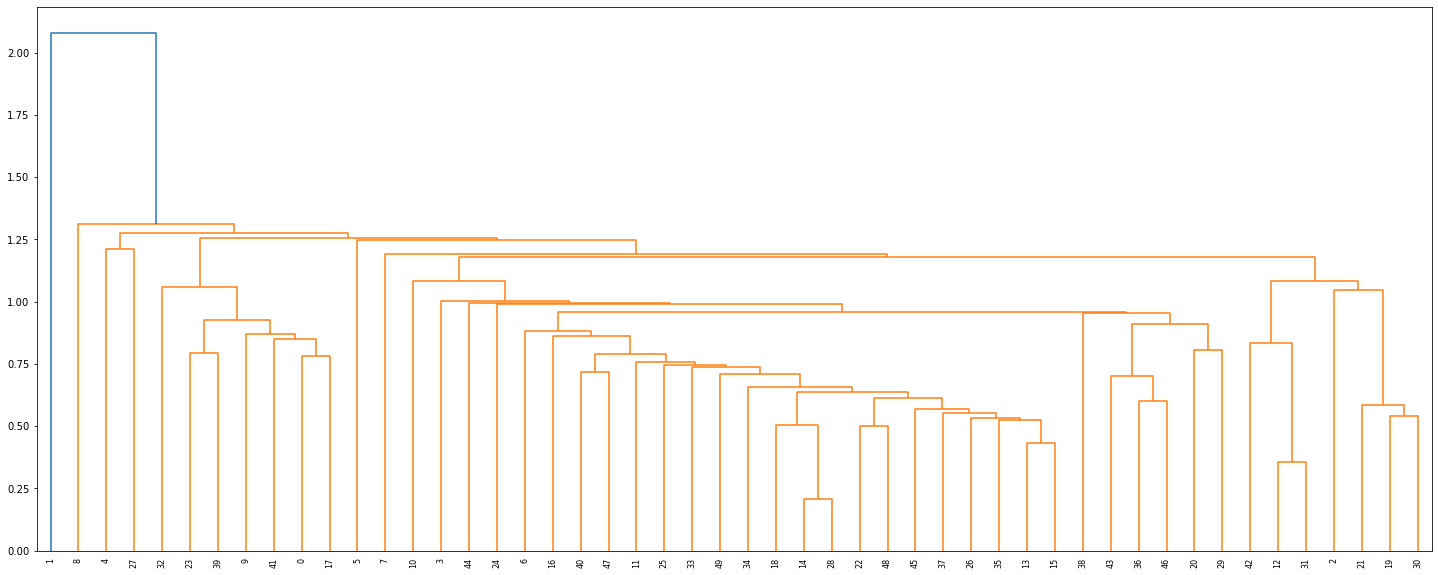

In [12]:
plt.figure(figsize=(25,10))
dendogram=sch.dendrogram(sch.linkage(scaled,'single'))
plt.show()

In [13]:
agglo=AgglomerativeClustering()
clusters=agglo.fit_predict(scaled)

In [15]:
crime_1=crime.copy()
crime_1['clusters']=agglo.labels_

In [16]:
crime_1.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [17]:
crime_1['clusters'].value_counts()

0    31
1    19
Name: clusters, dtype: int64

# KMeans

In [19]:
from sklearn.cluster import KMeans

# 1.Elbow Method

In [20]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=99)
    model=model.fit(scaled)
    wcss.append(model.inertia_)
wcss

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[200.0,
 104.96163315756871,
 80.08569526137275,
 57.55425863091104,
 50.05119672966492,
 44.79957541354088,
 40.39123903569526,
 35.22530585631473,
 31.42009785844361,
 28.778346722270715]

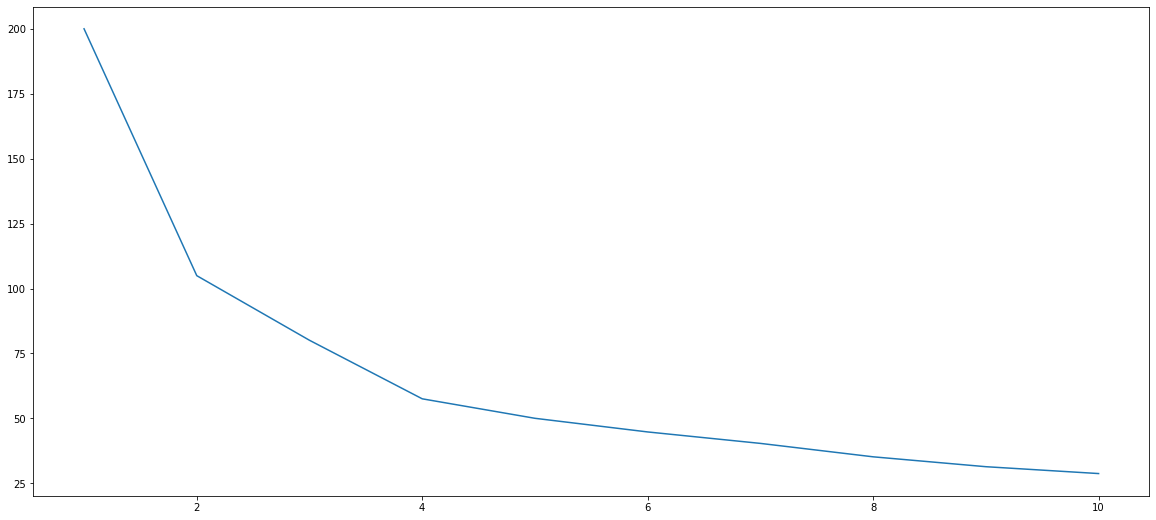

In [21]:
plt.figure(figsize=(20,9))
plt.plot(range(1,11),wcss)
plt.show()

## we can see that after 4 there is less decrease 

# 2.Silhouette score

In [22]:
from sklearn.metrics import silhouette_score

In [29]:
sc=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=99)
    cluster_labels=model.fit_predict(scaled)
    sc_avg=silhouette_score(scaled,cluster_labels)
    sc.append(sc_avg)
sc

[0.4084890326217641,
 0.30813622648945616,
 0.33968891433344395,
 0.30083681265939805,
 0.28711108611233405,
 0.24215474035118476,
 0.25979746831065414,
 0.26313446008529934,
 0.24925515495873568]

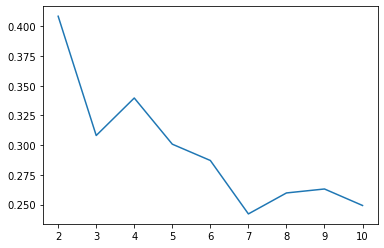

In [30]:
plt.plot(range(2,11),sc)
plt.show()

## we got peak at 2 so 2 is optimal value

# 3.Calinski harabasz score

In [27]:
from sklearn.metrics import calinski_harabasz_score

In [28]:
values=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=99)
    labels = model.fit_predict(scaled)
    calinski=calinski_harabasz_score(scaled,labels)
    values.append(calinski)
values    

[43.46199150301377,
 35.18713488296232,
 37.94972059900647,
 33.70397007493417,
 30.486086614741257,
 28.31957657698928,
 28.066418185120728,
 27.49743181475481,
 26.442975790888394]

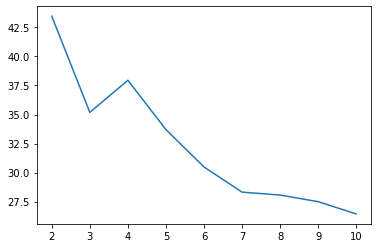

In [31]:
plt.plot(range(2,11),values)
plt.show()

# we can see that score high for no.of clusters=2

## So we construct using no.of clusters=2

In [33]:
model=KMeans(n_clusters=2,random_state=77)
y1=model.fit_predict(scaled)

In [34]:
crime_2=crime.copy()

In [35]:
crime_2['clusters']=y1

In [36]:
crime_2.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0


In [37]:
crime_2['clusters'].value_counts()

1    30
0    20
Name: clusters, dtype: int64

# DBSCAN

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
dbscan=DBSCAN()

In [40]:
labels=dbscan.fit_predict(scaled)

In [42]:
crime_3=crime.copy()
crime_3['clusters']=labels
crime_3.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [44]:
crime_3['clusters'].value_counts()

-1    50
Name: clusters, dtype: int64

## eps=1

In [45]:
dbscan1=DBSCAN(eps=1)

In [46]:
labels=dbscan1.fit_predict(scaled)

In [49]:
crime_3['clusters2']=labels
crime_3.head()

,Murder,Assault,UrbanPop,Rape,clusters,clusters2
0,13.2,236,58,21.2,-1,-1
1,10.0,263,48,44.5,-1,-1
2,8.1,294,80,31.0,-1,-1
3,8.8,190,50,19.5,-1,-1
4,9.0,276,91,40.6,-1,-1


In [50]:
crime_3['clusters2'].value_counts()

 0    24
-1    23
 1     3
Name: clusters2, dtype: int64

## eps=1.5

In [51]:
dbscan2=DBSCAN(eps=1.5)
labels=dbscan2.fit_predict(scaled)
crime_3['clusters3']=labels
crime_3.head()

,Murder,Assault,UrbanPop,Rape,clusters,clusters2,clusters3
0,13.2,236,58,21.2,-1,-1,0
1,10.0,263,48,44.5,-1,-1,-1
2,8.1,294,80,31.0,-1,-1,0
3,8.8,190,50,19.5,-1,-1,0
4,9.0,276,91,40.6,-1,-1,0


In [52]:
crime_3['clusters3'].value_counts()

 0    49
-1     1
Name: clusters3, dtype: int64

## eps=2

In [53]:
dbscan3=DBSCAN(eps=2)
labels=dbscan3.fit_predict(scaled)
crime_3['clusters4']=labels
crime_3.head()

,Murder,Assault,UrbanPop,Rape,clusters,clusters2,clusters3,clusters4
0,13.2,236,58,21.2,-1,-1,0,0
1,10.0,263,48,44.5,-1,-1,-1,-1
2,8.1,294,80,31.0,-1,-1,0,0
3,8.8,190,50,19.5,-1,-1,0,0
4,9.0,276,91,40.6,-1,-1,0,0


In [54]:
crime_3['clusters4'].value_counts()

 0    49
-1     1
Name: clusters4, dtype: int64

## eps=2.5

In [55]:
dbscan4=DBSCAN(eps=2.5)
labels=dbscan4.fit_predict(scaled)
crime_3['clusters5']=labels
crime_3.head()

,Murder,Assault,UrbanPop,Rape,clusters,clusters2,clusters3,clusters4,clusters5
0,13.2,236,58,21.2,-1,-1,0,0,0
1,10.0,263,48,44.5,-1,-1,-1,-1,0
2,8.1,294,80,31.0,-1,-1,0,0,0
3,8.8,190,50,19.5,-1,-1,0,0,0
4,9.0,276,91,40.6,-1,-1,0,0,0


In [56]:
crime_3['clusters5'].value_counts()

0    50
Name: clusters5, dtype: int64

## With different values of eps we will get different clusters and outliers